In [22]:
# Math import
import math
import numpy as np
import pandas as pd

# Graph import
import matplotlib.pyplot as plt
import matplotlib
# Use a more appealing style
matplotlib.style.use('ggplot')

# Plot in this notebook
%matplotlib inline

In [2]:
dataDir = "data/"

In [19]:
# Image resolution
width = 19.2
height = 10.8

# Multiplication of previous ones by dpi to have pixel resolution
dpi = 100 

### Get data

In [3]:
data = pd.read_json(dataDir + "paradox.json")
data.head()

,avgPlayers,gain,gameId,month,peakPlayers,percGain
0,NaN,None,236850,None,NaN,None
1,NaN,None,394360,None,NaN,None
2,13891.98,-2082.9,394360,Last 30 Days,25933.0,-13.04%
3,15974.93,4491.52,394360,March 2018,37055.0,+39.11%
4,11483.41,-186.89,394360,February 2018,21269.0,-1.60%


In [4]:
games = pd.read_csv(dataDir + "games.csv", sep=';')
games

,id,name
0,236850,Europa Universalis IV
1,203770,Crusader Kings 2
2,281990,Stellaris
3,394360,Hearts of Iron IV


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 6 columns):
avgPlayers     183 non-null float64
gain           183 non-null object
gameId         187 non-null int64
month          183 non-null object
peakPlayers    183 non-null float64
percGain       183 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 8.8+ KB


### Cleaning

In [6]:
data = data[~pd.isnull(data["avgPlayers"])]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 2 to 186
Data columns (total 6 columns):
avgPlayers     183 non-null float64
gain           183 non-null object
gameId         183 non-null int64
month          183 non-null object
peakPlayers    183 non-null float64
percGain       183 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 10.0+ KB


In [7]:
data = data[~data['month'].apply(lambda s : s.startswith("Last"))]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 3 to 186
Data columns (total 6 columns):
avgPlayers     179 non-null float64
gain           179 non-null object
gameId         179 non-null int64
month          179 non-null object
peakPlayers    179 non-null float64
percGain       179 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


### Formatting

In [8]:
data["date"] = pd.to_datetime(data["month"], format='%B %Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 3 to 186
Data columns (total 7 columns):
avgPlayers     179 non-null float64
gain           179 non-null object
gameId         179 non-null int64
month          179 non-null object
peakPlayers    179 non-null float64
percGain       179 non-null object
date           179 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 11.2+ KB


In [9]:
if (data["gain"].dtype != 'float64'):
    data.loc[data["gain"] == '-', "gain"] = np.nan
    data["gain"] = pd.to_numeric(data["gain"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 3 to 186
Data columns (total 7 columns):
avgPlayers     179 non-null float64
gain           175 non-null float64
gameId         179 non-null int64
month          179 non-null object
peakPlayers    179 non-null float64
percGain       179 non-null object
date           179 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 11.2+ KB


### Merging

In [30]:
mergedData = pd.merge(data, games, left_on='gameId', right_on='id')
del mergedData['id']
mergedData = mergedData.rename(index=str, columns={'name' : 'gameName'})
mergedData.head()

,avgPlayers,gain,gameId,month,peakPlayers,percGain,date,gameName
0,15974.93,4491.52,394360,March 2018,37055.0,+39.11%,2018-03-01,Hearts of Iron IV
1,11483.41,-186.89,394360,February 2018,21269.0,-1.60%,2018-02-01,Hearts of Iron IV
2,11670.30,494.75,394360,January 2018,20923.0,+4.43%,2018-01-01,Hearts of Iron IV
3,11175.55,704.68,394360,December 2017,19905.0,+6.73%,2017-12-01,Hearts of Iron IV
4,10470.87,756.15,394360,November 2017,19202.0,+7.78%,2017-11-01,Hearts of Iron IV


### Exploration

In [33]:
mergedData.set_index('gameName').transpose()

gameName,Hearts of Iron IV,Hearts of Iron IV,Hearts of Iron IV,Hearts of Iron IV,Hearts of Iron IV,Hearts of Iron IV,Hearts of Iron IV,Hearts of Iron IV,Hearts of Iron IV,Hearts of Iron IV,...,Crusader Kings 2,Crusader Kings 2,Crusader Kings 2,Crusader Kings 2,Crusader Kings 2,Crusader Kings 2,Crusader Kings 2,Crusader Kings 2,Crusader Kings 2,Crusader Kings 2
avgPlayers,15974.9,11483.4,11670.3,11175.5,10470.9,9714.72,9550.2,9326.35,10010.8,10177.3,...,1696.55,1783.81,2291.09,2147.02,1856.52,1411.88,1292.81,1144.14,1420.52,2105.53
gain,4491.52,-186.89,494.75,704.68,756.15,164.52,223.86,-684.49,-166.47,2195.43,...,-87.26,-507.29,144.08,290.5,444.64,119.08,148.66,-276.38,-685.01,NaN
gameId,394360,394360,394360,394360,394360,394360,394360,394360,394360,394360,...,203770,203770,203770,203770,203770,203770,203770,203770,203770,203770
month,March 2018,February 2018,January 2018,December 2017,November 2017,October 2017,September 2017,August 2017,July 2017,June 2017,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
peakPlayers,37055,21269,20923,19905,19202,18747,20215,15518,16566,20160,...,3148,3885,4593,4013,4011,2531,2773,2122,2487,3703
percGain,+39.11%,-1.60%,+4.43%,+6.73%,+7.78%,+1.72%,+2.40%,-6.84%,-1.64%,+27.51%,...,-4.89%,-22.14%,+6.71%,+15.65%,+31.49%,+9.21%,+12.99%,-19.46%,-32.53%,-
date,2018-03-01 00:00:00,2018-02-01 00:00:00,2018-01-01 00:00:00,2017-12-01 00:00:00,2017-11-01 00:00:00,2017-10-01 00:00:00,2017-09-01 00:00:00,2017-08-01 00:00:00,2017-07-01 00:00:00,2017-06-01 00:00:00,...,2013-04-01 00:00:00,2013-03-01 00:00:00,2013-02-01 00:00:00,2013-01-01 00:00:00,2012-12-01 00:00:00,2012-11-01 00:00:00,2012-10-01 00:00:00,2012-09-01 00:00:00,2012-08-01 00:00:00,2012-07-01 00:00:00


In [75]:
avgPlayers = pd.DataFrame()
for gameId in mergedData['gameId'].unique():
    df = mergedData[mergedData['gameId'] == gameId]
    gameName = df['gameName'].unique()[0]
    dataCol = 'avgPlayers'
    avgPlayers = avgPlayers.join(df[['date', dataCol]].set_index('date').rename(index=str, columns={dataCol: gameName}), how='outer')

In [77]:
avgPlayers.tail()

,Hearts of Iron IV,Stellaris,Europa Universalis IV,Crusader Kings 2
date,,,,
2017-11-01 00:00:00,10470.87,8379.55,11658.68,4297.84
2017-12-01 00:00:00,11175.55,9548.79,11773.05,5217.52
2018-01-01 00:00:00,11670.30,11293.75,11326.08,4845.49
2018-02-01 00:00:00,11483.41,15954.27,10902.52,4448.83
2018-03-01 00:00:00,15974.93,17120.62,11802.87,3910.04


In [79]:
mergedData[mergedData['month'] == 'March 2018']

,avgPlayers,gain,gameId,month,peakPlayers,percGain,date,gameName
0,15974.93,4491.52,394360,March 2018,37055.0,+39.11%,2018-03-01,Hearts of Iron IV
24,17120.62,1166.35,281990,March 2018,43837.0,+7.31%,2018-03-01,Stellaris
50,11802.87,900.35,236850,March 2018,27765.0,+8.26%,2018-03-01,Europa Universalis IV
110,3910.04,-538.79,203770,March 2018,6961.0,-12.11%,2018-03-01,Crusader Kings 2


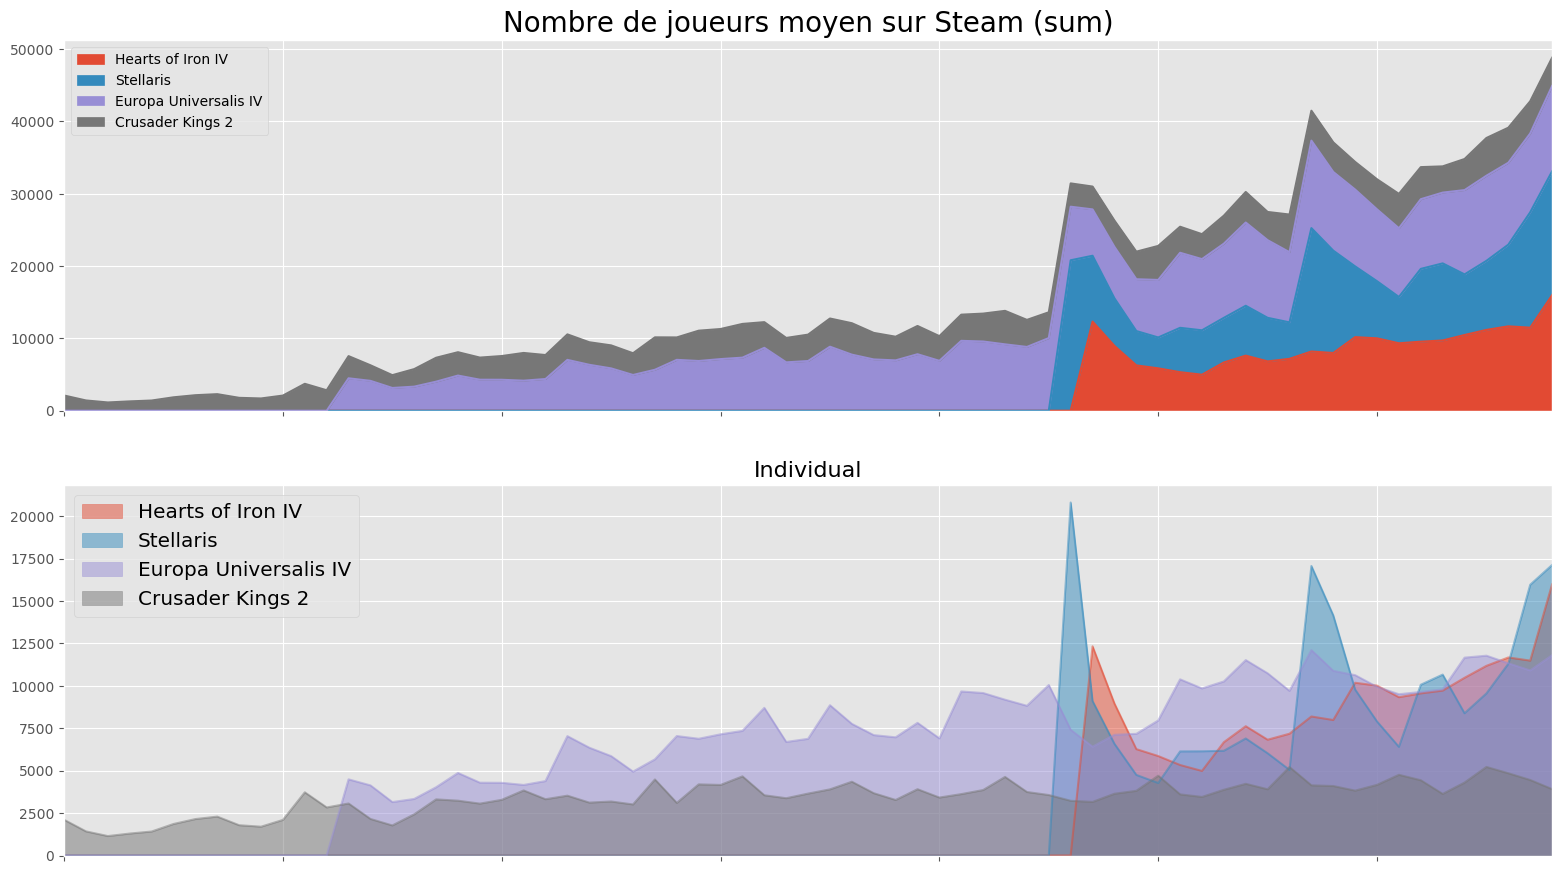

In [130]:
import matplotlib.dates as dates
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, height), dpi=dpi, sharex=True)
ax[0].set_title("Nombre de joueurs moyen sur Steam (sum)", fontsize=20)
avgPlayers.plot.area(stacked=True, ax=ax[0])
ax[1].set_title("Individual", fontsize=16)
avgPlayers.plot.area(stacked=False, ax=ax[1])
ax[1].set_xlabel("")
ax[1].set_xticklabels("")
plt.legend(loc=2, fontsize = 'x-large')
plt.savefig("Paradox average players.png", dpi=dpi)